In [ ]:
# вопросы к галитскому
# 1.

# дз
# 1.


# доучить
# 1.
# 2.
# 3.
# 4.
# 5.
# 6.


In [ ]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score


In [ ]:
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data), shuffle=False)


In [ ]:
dataiter = iter(train_loader)
imgs, labels = next(dataiter)

In [ ]:
imgs.shape, labels.shape

(torch.Size([8, 3, 32, 32]), torch.Size([8]))

In [ ]:
def show(imgs, labels):
  f, axes = plt.subplots(1, 8, figsize=(30, 30))
  for i, axis in enumerate(axes):
    axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(), (1, 2, 0))), cmap='gray')
    axes[i].set_title(labels[i].numpy())
  plt.show()

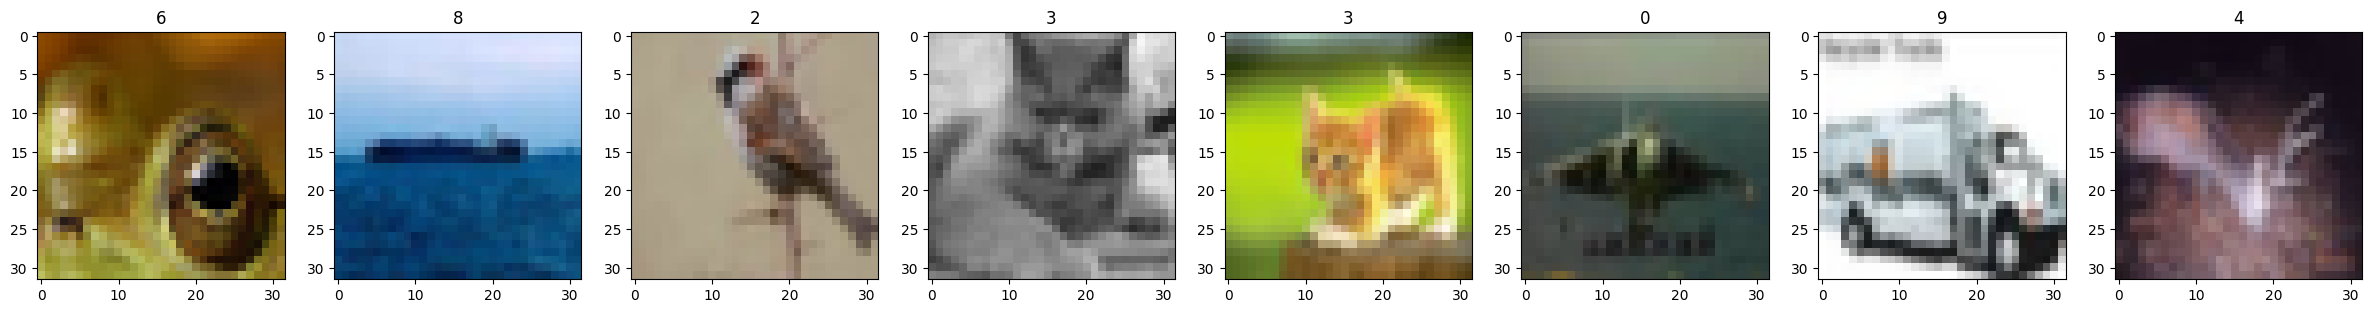

In [ ]:
show(imgs, labels)

In [ ]:
label_to_name = {
    0: "Самолет",
    1: "Авто",
    2: "Птрица",
    3: "Кот",
    4: "Олень",
    5: "Собака",
    6: "Лягушка",
    7: "Лошадь",
    8: "Корабль",
    9: "Грузовик",
}

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class ToVect(nn.Module):
    def forward(self, img):
      return img.view(img.size(0), -1)


In [ ]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.toVec = ToVect()
    self.fc1 = nn.Linear(32 * 32 * 3, 256)
    self.fc2 = nn.Linear(256, 10)

  def forward(self, x):
    x = self.toVec(x)
    x = F.relu(self.fc1(x))
    x = F.softmax(self.fc2(x))
    return x


In [ ]:
def train(net, n_ep=5):
  loss_fn = torch.nn.CrossEntropyLoss()
  l_r = 0.001
  optimizer = torch.optim.Adam(net.parameters(), lr=l_r)

  for ep in tqdm_notebook(range(n_ep)):
    losses = 0.
    train_dataiter = iter(train_loader)
    for i, batch in enumerate(tqdm_notebook(train_dataiter)):
      X_b, y_b = batch
      optimizer.zero_grad()

      y_pred = net(X_b)
      loss = loss_fn(y_pred, y_b)
      loss.backward()
      optimizer.step()
      losses += loss
      if i % 1000 == 999:
        print('[%d %5d] loss: %.3f' % (ep + 1, i + 1, losses / 1000))
        losses = 0.
  print('I am ready')
  return net



In [ ]:
# net = Classifier()
# net = train(net)

In [ ]:
test_dataiter = iter(test_loader)
img, labels = next(test_dataiter)


In [ ]:
accuracy_score(labels.numpy(), np.argmax(net.forward(img).detach().numpy(), axis=1))

RuntimeError: Given groups=1, weight of size [20, 2, 3, 3], expected input[10000, 3, 32, 32] to have 2 channels, but got 3 channels instead

In [ ]:
class ToVect(nn.Module):
    def forward(self, img):
      return img.view(img.size(0), -1)

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 20, kernel_size=3)
    self.conv2 = nn.Conv2d(20, 3, kernel_size=3)
    self.toVec = ToVect()
    self.fc = nn.Linear(2352, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.toVec(x)
    x = F.softmax(self.fc(x))
    return x

In [ ]:
net = CNN()

In [ ]:
net = train(net)

<ipython-input-112-fd6c9746c3b4>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ep in tqdm_notebook(range(n_ep)):


  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-112-fd6c9746c3b4>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(train_dataiter)):


  0%|          | 0/6250 [00:00<?, ?it/s]

<ipython-input-139-a377770789f9>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc(x))


[1  1000] loss: 2.220
[1  2000] loss: 2.152
[1  3000] loss: 2.140
[1  4000] loss: 2.120
[1  5000] loss: 2.117
[1  6000] loss: 2.099


  0%|          | 0/6250 [00:00<?, ?it/s]

[2  1000] loss: 2.101
[2  2000] loss: 2.086
[2  3000] loss: 2.090
[2  4000] loss: 2.086
[2  5000] loss: 2.091
[2  6000] loss: 2.082


  0%|          | 0/6250 [00:00<?, ?it/s]

[3  1000] loss: 2.076
[3  2000] loss: 2.080
[3  3000] loss: 2.077
[3  4000] loss: 2.077
[3  5000] loss: 2.073
[3  6000] loss: 2.060


  0%|          | 0/6250 [00:00<?, ?it/s]

[4  1000] loss: 2.065
[4  2000] loss: 2.068
[4  3000] loss: 2.073
[4  4000] loss: 2.064
[4  5000] loss: 2.071
[4  6000] loss: 2.079


  0%|          | 0/6250 [00:00<?, ?it/s]

[5  1000] loss: 2.055
[5  2000] loss: 2.071
[5  3000] loss: 2.063
[5  4000] loss: 2.057
[5  5000] loss: 2.056
[5  6000] loss: 2.067
I am ready


In [ ]:
accuracy_score(labels.numpy(), np.argmax(net.forward(img).detach().numpy(), axis=1))

<ipython-input-139-a377770789f9>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc(x))


0.3731

In [ ]:
from torchvision import models
vgg16 = models.vgg16(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:09<00:00, 58.4MB/s]


In [145]:
vgg16.parameters

<bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): ReLU(inplace=True)
    (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (20): ReLU(inplace=True)
    (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): ReLU(inplace=True)
    (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): ReLU(inplace=True)
    (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (27): ReLU(inplace=True)
    (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): ReLU(inplace=True)
    (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  )
)>